In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

In [7]:
resp_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_jateng_raw = resp_jateng.json()
cov_jateng = pd.DataFrame(cov_jateng_raw['list_perkembangan'])
print('Info cov_jateng:\n', cov_jateng.info())
print('\nLima data teratas cov_jateng:\n', cov_jateng.head())
print('\nLima data terakhir cov_jateng:\n', cov_jateng.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       837 non-null    int64
 1   KASUS                         837 non-null    int64
 2   MENINGGAL                     837 non-null    int64
 3   SEMBUH                        837 non-null    int64
 4   DIRAWAT_OR_ISOLASI            837 non-null    int64
 5   AKUMULASI_KASUS               837 non-null    int64
 6   AKUMULASI_SEMBUH              837 non-null    int64
 7   AKUMULASI_MENINGGAL           837 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  837 non-null    int64
dtypes: int64(9)
memory usage: 59.0 KB
Info cov_jateng:
 None

Lima data teratas cov_jateng:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583625600000      1          1       0                   0   
1  1583712000000      0          0       0 

In [8]:
cov_jateng_tidy = (cov_jateng.drop(columns=[item for item in cov_jateng.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jateng_tidy['tanggal'] = pd.to_datetime(cov_jateng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jateng_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0


C:\Users\asus\AppData\Local\Temp/ipykernel_17048/2721230762.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

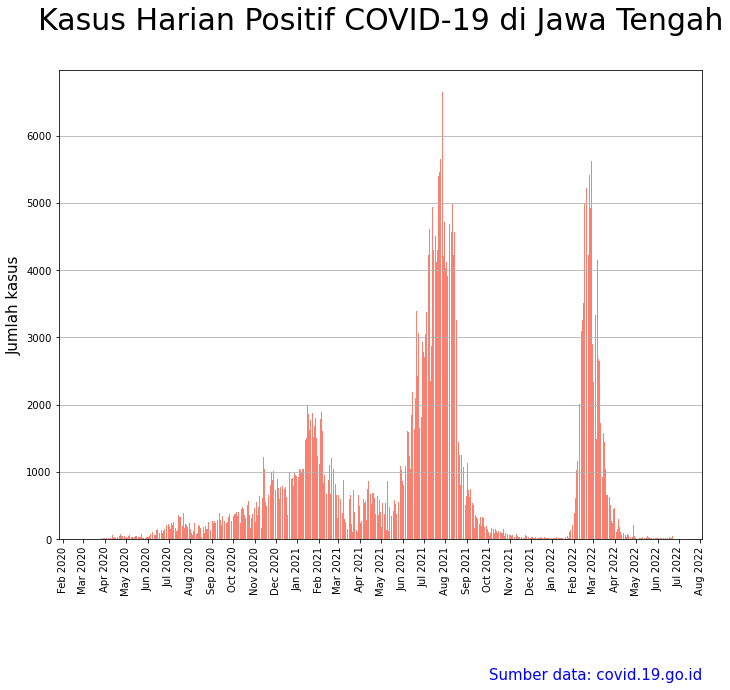

In [9]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='kasus_baru', color='salmon')
ax.set_title('Kasus Harian Positif COVID-19 di Jawa Tengah',
             fontsize=30, pad=40)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=15)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes, fontsize=15)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()
s

C:\Users\asus\AppData\Local\Temp/ipykernel_17048/1682499425.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

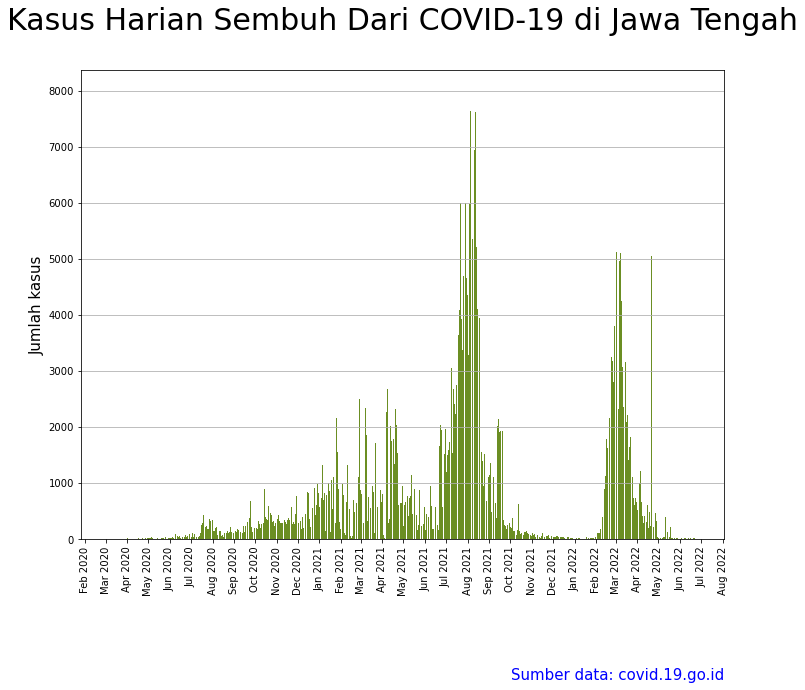

In [10]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Tengah',
             fontsize=30, pad=40)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=15)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=15)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_17048/1215896385.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

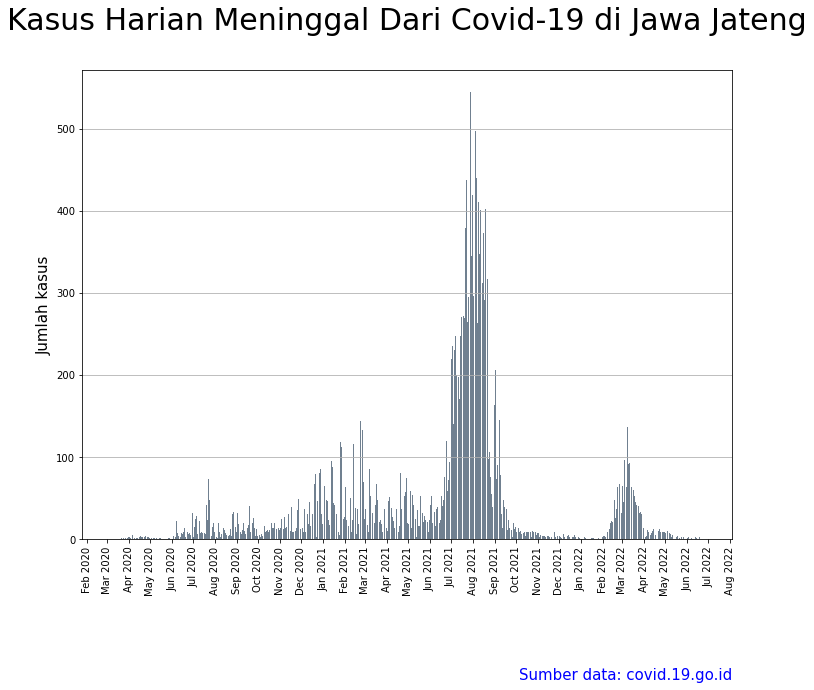

In [11]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari Covid-19 di Jawa Jateng',
             fontsize=30, pad=40)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=15)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=15)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [12]:
cov_jateng_akumulasi = cov_jateng_tidy[['tanggal']].copy()
cov_jateng_akumulasi['akumulasi_aktif'] = (cov_jateng_tidy['kasus_baru'] - cov_jateng_tidy['sembuh'] - cov_jateng_tidy['meninggal']).cumsum()
cov_jateng_akumulasi['akumulasi_sembuh'] = cov_jateng_tidy['sembuh'].cumsum()
cov_jateng_akumulasi['akumulasi_meninggal'] = cov_jateng_tidy['meninggal'].cumsum()
print(cov_jateng_akumulasi.tail())



       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
832 2022-06-18              333            594227                33299
833 2022-06-19              344            594232                33300
834 2022-06-20              355            594241                33300
835 2022-06-21              356            594261                33300
836 2022-06-22              384            594273                33301


C:\Users\asus\AppData\Local\Temp/ipykernel_17048/2909107363.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

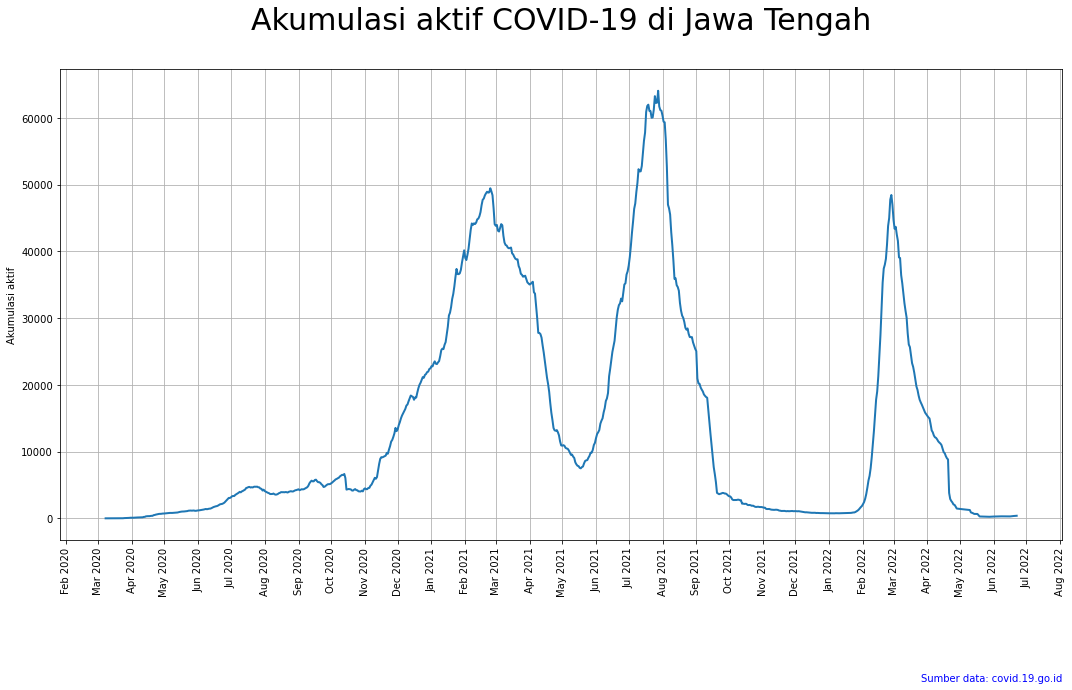

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,10))
ax.plot('tanggal','akumulasi_aktif', data=cov_jateng_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Tengah',
             fontsize=30, pad=40)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()



<Figure size 432x288 with 0 Axes>

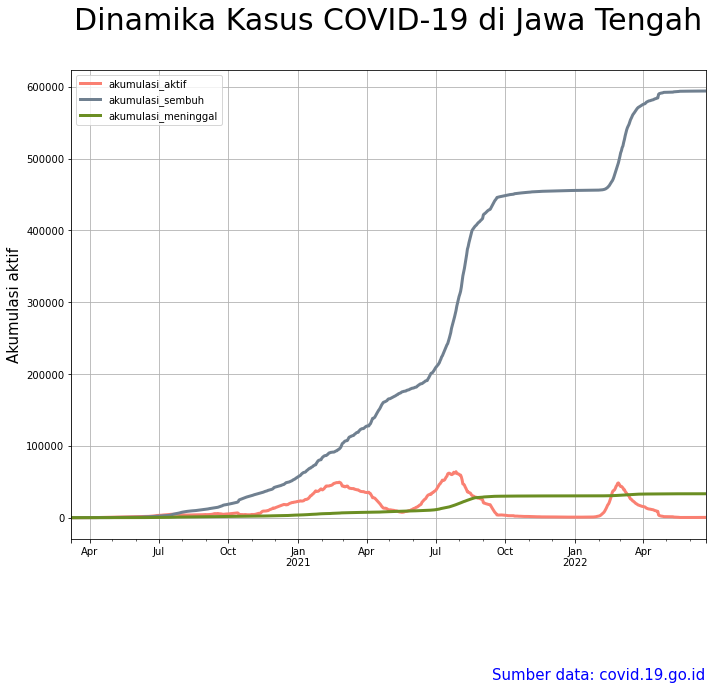

In [14]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))
cov_jateng_akumulasi_ts = cov_jateng_akumulasi.set_index('tanggal')
cov_jateng_akumulasi_ts.plot(kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah', fontsize=30, pad=40)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif', fontsize=15)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes, fontsize=15)


plt.grid()
plt.tight_layout()
plt.show()